In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = torchvision.datasets.FashionMNIST(root='data',
                                              train=True,
                                              download=True,
                                              transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.FashionMNIST(root='data',
                                             train=False,
                                             download=True,
                                             transform=torchvision.transforms.ToTensor())

100%|█████████▉| 26361856/26421880 [00:07<00:00, 3994609.71it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



0it [00:00, ?it/s]
 56%|█████▌    | 16384/29515 [00:00<00:00, 69377.59it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




0it [00:00, ?it/s]

  0%|          | 0/4422102 [00:00<?, ?it/s]

  0%|          | 16384/4422102 [00:00<01:04, 68282.06it/s]

  1%|          | 49152/4422102 [00:01<00:40, 107789.42it/s]

  2%|▏         | 106496/4422102 [00:01<00:26, 164482.41it/s]

  5%|▌         | 229376/4422102 [00:01<00:14, 299438.02it/s]

 11%|█         | 466944/4422102 [00:01<00:07, 541208.07it/s]

 21%|██▏       | 950272/4422102 [00:02<00:03, 1029818.56it/s]

 43%|████▎     | 1908736/4422102 [00:02<00:01, 1983663.12it/s]

 60%|██████    | 2662400/4422102 [00:02<00:00, 2114956.98it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw





0it [00:00, ?it/s]


  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


In [10]:
torch.randint(len(train_data), (1,))

tensor([57237])

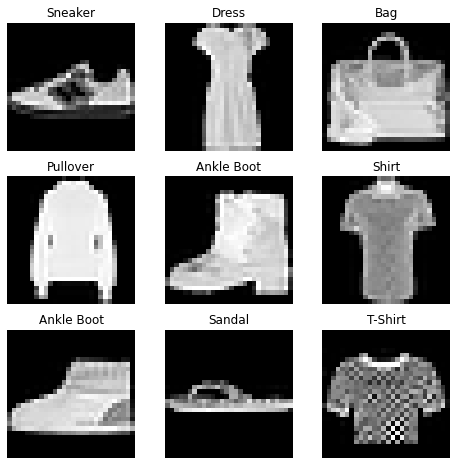

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig, axes = plt.subplots(3, 3, figsize=(8,8))

for ax in axes.ravel():
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    ax.set_title(labels_map[label])
    ax.axis('off')
    ax.imshow(img.squeeze(), cmap='gray')
plt.show()

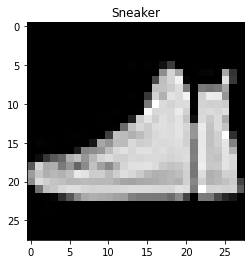

In [30]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

X_train, y_train = next(iter(train_dl))
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title(f'{labels_map[y_train[0].item()]}')
plt.show()

## Dataset + OH

In [44]:
# y OH 까지 한 방에!
ds = torchvision.datasets.FashionMNIST(root='data',
                                      train=True,
                                      download=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
